# Demonstration of SpaTrio on demo2 dataset

## Import SpaTrio

In [1]:
import spatrio
import pandas as pd

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-lmbkyfkt because the default path (/home/yph/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Read in input datasets

In [2]:
path = 'data/demo2/'

spot_ann = spatrio.load_data(path+"spatial_rna.csv" )
single_ann = spatrio.load_data( path+"multi_rna.csv" )
spot_meta =  pd.read_csv(path+"spatial_meta.csv", index_col=0)
spot_meta['type'] = spot_meta['type'].apply(lambda x: str(x))
single_meta =  pd.read_csv(path+"multi_meta.csv", index_col=0)
single_meta['type'] = single_meta['type'].apply(lambda x: str(x))
spot_meta[['sample']] = "spot"
single_meta[['sample']] = "single"
spot_ann.obs['type'] = spot_meta['type']
spot_ann.obs['type'] = spot_ann.obs['type'].astype(object)
single_ann.obs['type'] = single_meta['type']

pos = pd.read_csv(path+"pos.csv", index_col=0)
emb = pd.read_csv(path+"emb.csv", index_col=0)
spot_ann.obsm['spatial'] = pos
single_ann.obsm['reduction'] = emb

## Process input datasets

In [3]:
data1,data2 = spatrio.process_input(spot_ann,single_ann,marker_use=False,min_cells=0)

## Align cells to spots using Optimal Transport

In [4]:
spatrio_decon = spatrio.ot_alignment(adata1 = data1, adata2 = data2, alpha = 0.1, aware_power = 2,
aware_spatial = True,aware_multi=True,use_gpu=False)
spatrio_decon

Calculating dissimilarity using euclidean distance on scaled data...
Constructing connectivity...
k = 10
aware_spatial = True
aware_multi = True
aware power = 2
Running OT...
alpha = 0.1
OT done!


,spot,cell,value
29787,S60,09F_AAAGGGTACTGT,0.001333
50675,S112,09E_AAAACGTACCCA,0.001333
49113,S134,09B_GCTTATTCAATC,0.001333
10764,S68,09F_CAAAGCCCATGT,0.001333
16933,S18,09F_ATTAAAATAGAA,0.001333
...,...,...,...
22911,S121,09D_AACCAGAAATTA,0.000000
22912,S141,09D_AACCAGAAATTA,0.000000
22913,S110,09D_AACCAGAAATTA,0.000000
22914,S107,09D_AACCAGAAATTA,0.000000


## Assign coordinates to individual cells

In [5]:
spatrio_map = spatrio.assign_coord(adata1 = data1,adata2 = data2,out_data = spatrio_decon,random=False,top_num=5)
# We provide the number of cell types in each spot in ref_counts.csv. This dataframe can be converted to the number of cells in each spot.
# ref_counts = pd.read_csv("ref_path/ref_counts.csv",index_col=0)
# expected_num = pd.DataFrame({'cell_num':ref_counts.sum(axis=1).tolist()},index = ref_counts.index.values)
# spatrio_map = spatrio.assign_coord(adata1 = data1,adata2 = data2,out_data = spatrio_decon,random = False,expected_num = expected_num)
spatrio_map

Assigning spatial coordinates to cells...
top_num = 5
random = False
There are 91 spots and 91 of them were assigned cells.
Assignment done!


,spot,cell,value,spot_type,cell_type,x,y,Cell_xcoord,Cell_ycoord
61,S1,09D_CATTGCAATAAC,0.001333,Cell type 1,Cell type 1,-1.732051,1.0,-1.434024,0.941380
67,S1,09F_AACGAACCCCCC,0.001333,Cell type 1,Cell type 1,-1.732051,1.0,-1.781712,1.126082
133,S1,09L_CCTGCCAATTGC,0.001333,Cell type 1,Cell type 1,-1.732051,1.0,-1.716362,1.110940
224,S1,09I_GAACTGCCACCC,0.001333,Cell type 1,Cell type 1,-1.732051,1.0,-1.497672,0.861149
152,S1,09H_GGCAATCATAGA,0.001333,Cell type 1,Cell type 3,-1.732051,1.0,-2.230484,0.960449
...,...,...,...,...,...,...,...,...,...
373,S99,09D_CAATGCCTGACT,0.001333,Cell type 2,Cell type 2,0.866025,-2.5,0.865726,-2.399023
398,S99,09I_TGCCCCCGAAAT,0.001333,Cell type 2,Cell type 2,0.866025,-2.5,1.020302,-2.454749
414,S99,09A_AGTCCGCGATTC,0.001333,Cell type 2,Cell type 2,0.866025,-2.5,1.000714,-2.753215
421,S99,09C_TAGTACCAGGTC,0.001333,Cell type 2,Cell type 2,0.866025,-2.5,0.998338,-2.662784


## Plot of input ST dataset

... storing 'type' as categorical


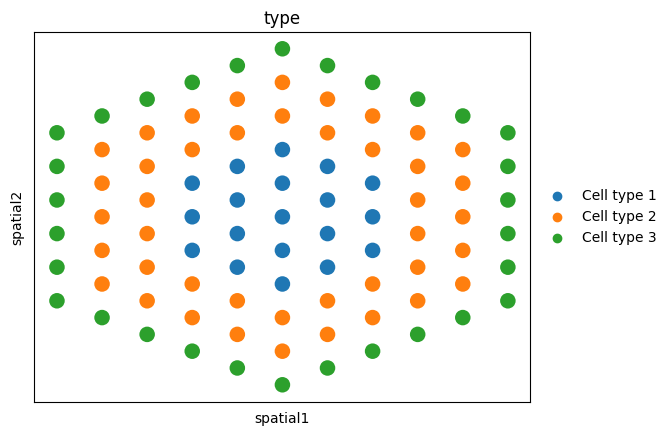

In [6]:
spatrio.spatial_plot(data1,info=pos ,color_by = 'type',mode = 1,size=500)

## Plot of SpaTrio results

... storing 'type' as categorical


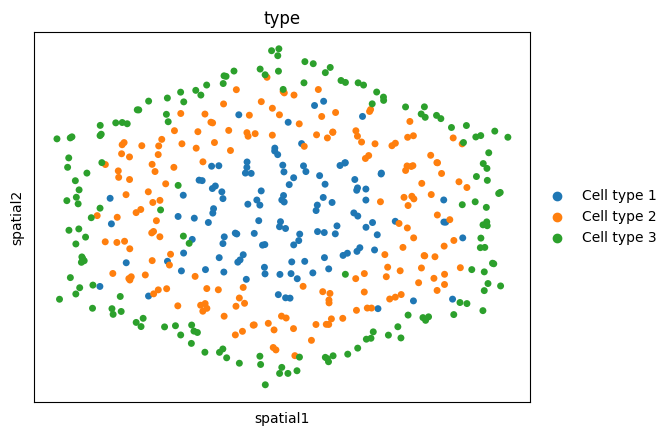

In [7]:
spatrio.spatial_plot(data2, spatrio_map, color_by = 'type',mode = 2,size=100)